## S&P500 MARKET TREND ANALYSIS
 
In this analysis we want to see the overall trend or historic performance of S&P500 in the last 50 years and later we can compare it to how tech has influended market in the last 50 years. In this analysis we will try to find the answer to the follwing questions:
- 1. What is the trend of the S&P500 in the last 50 years?
- 2. What are the yearly return of the S&P500 over last 50 years?
- 3. How did the majot technological milestones such as rise of internet, smartphones, AI affected S&P500?


 ### 1. What is the trend of the S&P500 in the last 50 years?

In [1]:
import pandas as pd
import yfinance as yf # need to import yahoo finance in order download stock data directly from yahoo finance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

# Download S&P 500 historical data (last 50 years)
sp500 = yf.Ticker('^GSPC')  # ^gspc is the ticker for sp500 
sp500_df = sp500.history(start='1974-01-02') # took historic data of open, high, close, volume, dividends, stock splits, date as index for last 50 years




In [2]:
sp500_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1974-01-02 00:00:00-05:00,0.000000,98.379997,96.250000,97.680000,12060000,0.0,0.0
1974-01-03 00:00:00-05:00,0.000000,100.940002,98.019997,99.800003,24850000,0.0,0.0
1974-01-04 00:00:00-05:00,0.000000,100.699997,97.699997,98.900002,21700000,0.0,0.0
1974-01-07 00:00:00-04:00,0.000000,99.309998,96.860001,98.070000,19070000,0.0,0.0
1974-01-08 00:00:00-04:00,0.000000,98.260002,95.580002,96.120003,18080000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,0.0,0.0
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,0.0,0.0
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,0.0,0.0


In [3]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12793 entries, 1974-01-02 00:00:00-05:00 to 2024-09-24 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          12793 non-null  float64
 1   High          12793 non-null  float64
 2   Low           12793 non-null  float64
 3   Close         12793 non-null  float64
 4   Volume        12793 non-null  int64  
 5   Dividends     12793 non-null  float64
 6   Stock Splits  12793 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 799.6 KB


Plot the S&p500 last 50 year trend


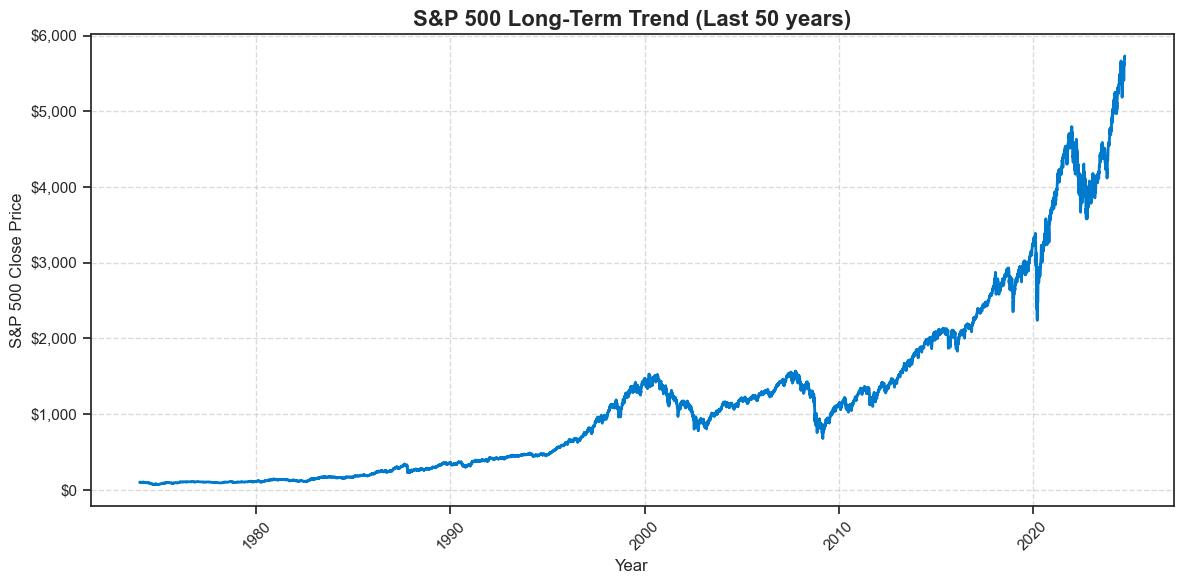

In [4]:

sns.set_theme(style='ticks')

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
sns.lineplot(data=sp500_df, x=sp500_df.index, y='Close', ax=ax, linewidth=2, color='#007acc')

ax.set_title('S&P 500 Long-Term Trend (Last 50 years)', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('S&P 500 Close Price', fontsize=12)



# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


# add $ sign to y axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 2. What are the yearly return of the S&P500 over last 50 years?

In [5]:
# Calculate yearly returns
sp500_df['Year'] = sp500_df.index.year
sp500_df['Yearly_Return'] = sp500_df['Close'].pct_change(252) * 100  # because there are usually 252 trading days in a year


In [6]:
sp500_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Yearly_Return
Date,,,,,,,,,
1974-01-02 00:00:00-05:00,0.000000,98.379997,96.250000,97.680000,12060000,0.0,0.0,1974,NaN
1974-01-03 00:00:00-05:00,0.000000,100.940002,98.019997,99.800003,24850000,0.0,0.0,1974,NaN
1974-01-04 00:00:00-05:00,0.000000,100.699997,97.699997,98.900002,21700000,0.0,0.0,1974,NaN
1974-01-07 00:00:00-04:00,0.000000,99.309998,96.860001,98.070000,19070000,0.0,0.0,1974,NaN
1974-01-08 00:00:00-04:00,0.000000,98.260002,95.580002,96.120003,18080000,0.0,0.0,1974,NaN
...,...,...,...,...,...,...,...,...,...
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,0.0,0.0,2024,26.152963
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,0.0,0.0,2024,28.571201
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,0.0,0.0,2024,29.538630


In [7]:
# Group by year to get yearly returns
yearly_returns = sp500_df.groupby('Year')['Yearly_Return'].last()

In [8]:
yearly_returns

Year
1974   -29.811633
1975    28.420900
1976    18.217819
1977   -11.501955
1978     1.062042
1979    11.588958
1980    28.366104
1981   -10.114415
1982    14.583674
1983    19.220758
1984     1.950751
1985    26.333408
1986    15.544636
1987     0.255632
1988     8.509806
1989    27.250465
1990    -8.193167
1991    27.765349
1992     3.903752
1993     7.136296
1994    -1.539291
1995    34.110655
1996    19.220367
1997    31.671209
1998    26.668589
1999    19.526047
2000   -10.139185
2001   -12.088518
2002   -23.365964
2003    26.380400
2004     8.993452
2005     3.001023
2006    13.064205
2007     3.062335
2008   -37.584650
2009    23.454190
2010    12.782714
2011    -0.003184
2012    14.128063
2013    29.601250
2014    11.390634
2015    -0.726600
2016     9.535023
2017    18.866209
2018    -6.723246
2019    28.878070
2020    15.292907
2021    26.892739
2022   -19.654385
2023    26.078582
2024    32.704872
Name: Yearly_Return, dtype: float64

In [9]:

# Create a df for returns
df_returns = yearly_returns.reset_index()
df_returns.columns = ['Year', 'Return']

# Calculate cumulative returns
df_returns['Cumulative'] = (1 + df_returns['Return'] / 100).cumprod() - 1

Create the plot of yearly return

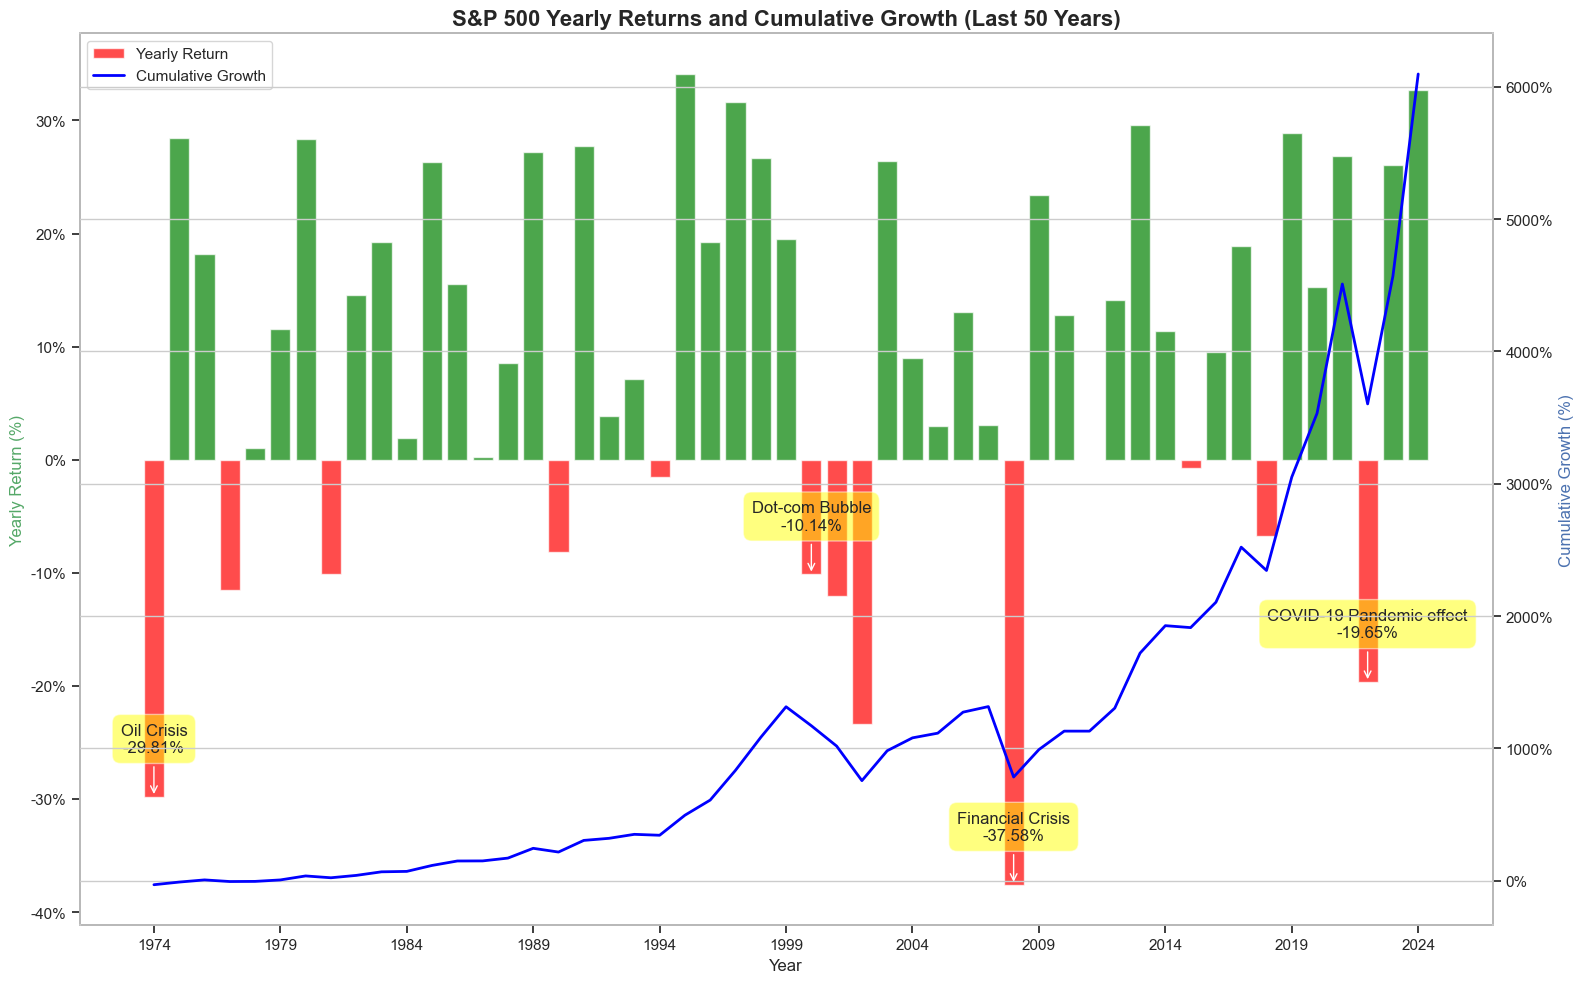

Average Annual Return: 9.88%
Best Year: 1995 (34.11%)
Worst Year: 2008 (-37.58%)
Positive Years: 38 (74.5%)
Negative Years: 13 (25.5%)
Total Cumulative Growth: 6096.97%


In [10]:
# Creating the plot
fig, ax1 = plt.subplots(figsize=(16, 10))

sns.set_style("whitegrid")

# Creating a bar plot for yearly returns
bars=ax1.bar(df_returns['Year'], df_returns['Return'], color=np.where(df_returns['Return'] >= 0, 'green', 'red'), alpha=0.7)

# Customize the primary y-axis (yearly returns)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Yearly Return (%)', fontsize=12, color='g')

# Creating a secondary y-axis for cumulative returns
ax2 = ax1.twinx()
ax2.plot(df_returns['Year'], df_returns['Cumulative'] * 100, color='blue', linewidth=2)
ax2.set_ylabel('Cumulative Growth (%)', fontsize=12, color='b')

plt.title('S&P 500 Yearly Returns and Cumulative Growth (Last 50 Years)', fontsize=16, fontweight='bold')

# Show every 5th year
plt.xticks(df_returns['Year'][::5])

# Customize y-axis formats
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))


# Defining major events
events = [
    (1974, "Oil Crisis"),
    (2000, "Dot-com Bubble"),
    (2008, "Financial Crisis"),
    (2022, "COVID-19 Pandemic effect")
]

# Add annotations for major events
for year, event in events:
    if year in df_returns['Year'].values:
        return_value = df_returns.loc[df_returns['Year'] == year, 'Return'].values[0]
        ax1.annotate(f"{event}\n{return_value:.2f}%", 
                     (year, return_value), 
                     xytext=(0, 30 if return_value < 0 else -30),
                     textcoords="offset points", 
                     ha='center', 
                     va='bottom' if return_value < 0 else 'top',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add legend
ax1.legend([bars, ax2.get_lines()[0]], ['Yearly Return', 'Cumulative Growth'], loc='upper left')

plt.tight_layout()
plt.show()

# Summary statistics
max_year = df_returns.loc[df_returns['Return'].idxmax(), 'Year']
min_year = df_returns.loc[df_returns['Return'].idxmin(), 'Year']
print(f"Average Annual Return: {df_returns['Return'].mean():.2f}%")
print(f"Best Year: {max_year} ({df_returns['Return'].max():.2f}%)")
print(f"Worst Year: {min_year} ({df_returns['Return'].min():.2f}%)")
print(f"Positive Years: {(df_returns['Return'] > 0).sum()} ({(df_returns['Return'] > 0).mean()*100:.1f}%)")
print(f"Negative Years: {(df_returns['Return'] < 0).sum()} ({(df_returns['Return'] < 0).mean()*100:.1f}%)")
print(f"Total Cumulative Growth: {df_returns['Cumulative'].iloc[-1]*100:.2f}%")

The 1974 oil crash, 2000 dot-com crash, 2008 housing creash and 2020 Covid-19 effect can be clearly seen through the graph

### 3. How did the majot technological milestones such as rise of internet, smartphones, AI affected S&P500?

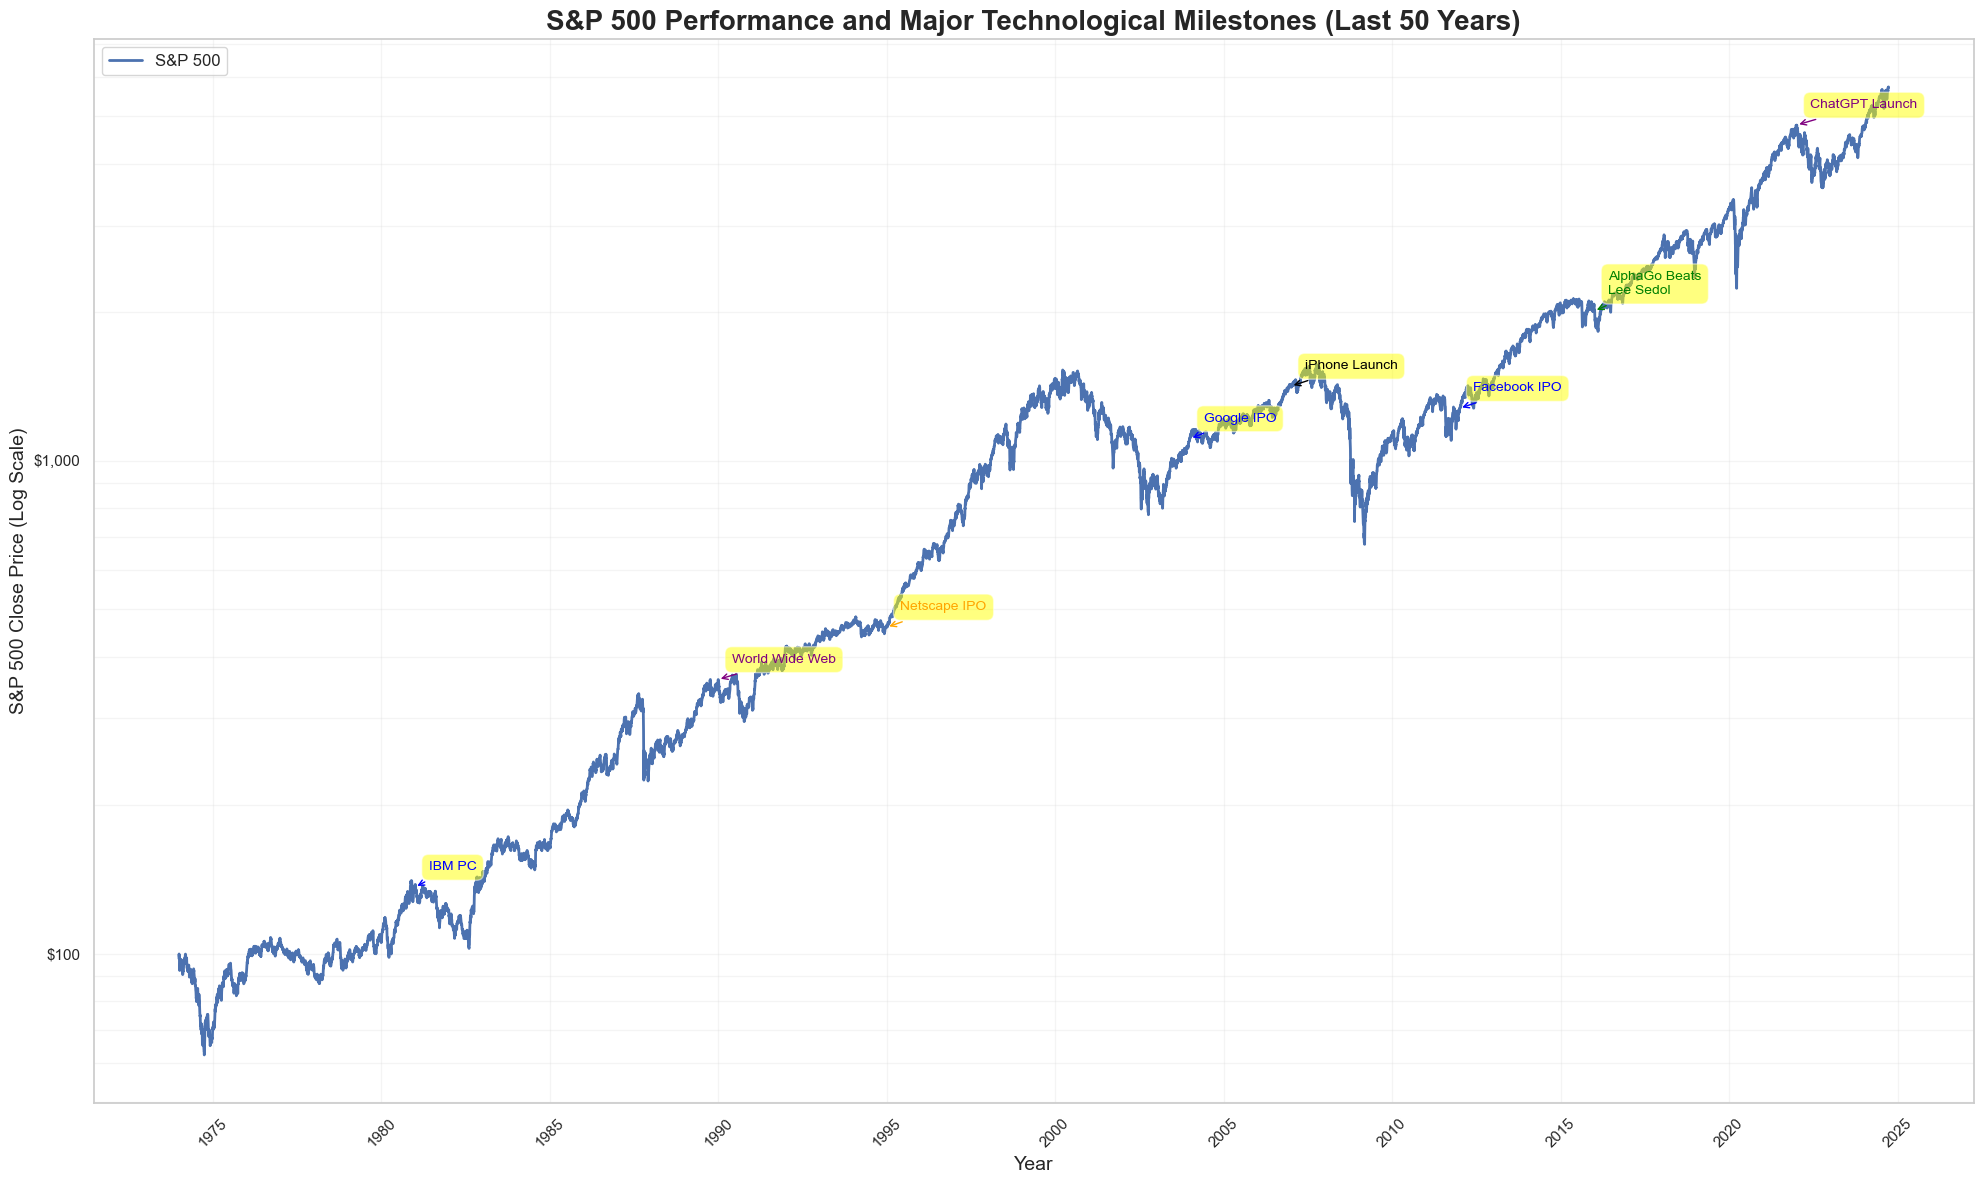

Starting Value: $97.68
Ending Value: $5732.93
Total Growth: 5769.09%


In [11]:
sns.set_style("whitegrid")
sns.set_palette("deep")

# Creating the plot
plt.figure(figsize=(20, 12))
ax = sns.lineplot(x=sp500_df.index, y=sp500_df['Close'], linewidth=2)

# Set y-axis to logarithmic scale to display growth more evenly accross entire time period
ax.set_yscale('log')

# Customize the plot
plt.title('S&P 500 Performance and Major Technological Milestones (Last 50 Years)', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('S&P 500 Close Price (Log Scale)', fontsize=14)

# Defining major technological milestones
milestones = [
    (1981, 'IBM PC', 'blue'),
    (1990, 'World Wide Web', 'purple'),
    (1995, 'Netscape IPO', 'orange'),
    (2004, 'Google IPO', 'blue'),
    (2007, 'iPhone Launch', 'black'),
    (2012, 'Facebook IPO', 'blue'),
    (2016, 'AlphaGo Beats\nLee Sedol', 'green'),
    (2022, 'ChatGPT Launch', 'purple')
]

# Plotting technological milestones on the S&P 500 graph
for year, event, color in milestones:
    if year in sp500_df.index.year:
        price = sp500_df.loc[sp500_df.index.year == year, 'Close'].values[0]
        plt.annotate(event, (mdates.date2num(pd.Timestamp(f'{year}-01-01')), price), xytext=(10, 10), 
                     textcoords='offset points', ha='left', va='bottom',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=color),
                     fontsize=10, color=color)

# Customizing x-axis to show ticks every 5 years
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Customizing y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adding gridlines
plt.grid(True, which="both", ls="-", alpha=0.2)

# Adding a legend
plt.legend(['S&P 500'], loc='upper left', fontsize=12)


plt.tight_layout()
plt.show()

# Printing summary statistics
print(f"Starting Value: ${sp500_df['Close'].iloc[0]:.2f}")
print(f"Ending Value: ${sp500_df['Close'].iloc[-1]:.2f}")
print(f"Total Growth: {(sp500_df['Close'].iloc[-1] / sp500_df['Close'].iloc[0] - 1) * 100:.2f}%")

This graph clearly illustrates the major technological events thoughout history and its effects on the S&P500 like the IBM pc launch in 1981, WWW in 1990, netscape in 1995 allowed internet browsing as an impact on market which lasted till the dotcom crash, Google IPO cahnged the market as internt acccess and browsing became easy adn accessable, Iphone launch introduced the world of smartphone which affected the market, Facebook ipo introduce the social media world that has it effect on the market, alphago vs lee the match between ai and human with ai leading started the Ai revolution, 2022 the launch of chat gpt has boomed companies like nvdia effecting the stock market once again.